In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip /content/drive/MyDrive/dataset.zip

In [ ]:
import cv2
import numpy as np
import glob
import pickle
from keras.applications.vgg16 import preprocess_input
from sklearn import preprocessing
from keras.preprocessing import image
import numpy as np
import glob
import keras
from keras.models       import Model
from keras.applications.densenet import DenseNet121
from keras.applications.vgg16 import VGG16
from keras.applications.densenet import DenseNet121
from keras.models import Model
import glob

In [ ]:
file="/content/drive/MyDrive/Thesis FINAL/Dataset/First Set/100x Normal Oral Cavity Histopathological Images/*"
fileo='/content/drive/MyDrive/Thesis FINAL/Dataset/First Set/100x OSCC Histopathological Images/*'

In [ ]:
for flp in glob.iglob('/content/drive/MyDrive/Thesis FINAL/Dataset/First Set/100x Normal Oral Cavity Histopathological Images/*'):
    print(flp)
    if flp[8] == 'O':
        img	= cv2.imread(flp)
        print(img.shape)
    break;

/content/drive/MyDrive/Thesis FINAL/Dataset/First Set/100x Normal Oral Cavity Histopathological Images/Normal_100x_63.jpg


In [ ]:
my_images = []

my_img_vals = []

lables = []
shape=set()
rescale = []

for flp in glob.iglob(file):
    print(flp)
  
    if flp[8] == 'O':
        img	= cv2.imread(flp)
        my_images_colored = cv2.imread(flp)
        my_images.append([my_images_colored, 0])
        shape.add(img.shape)
        im = cv2.resize(img, (150, 200))
        rescale.append(im)
    else :
      img	= cv2.imread(flp)
      my_images_colored = cv2.imread(flp)
      my_images.append([my_images_colored, 1])
      shape.add(img.shape)
      im = cv2.resize(img, (150, 200))
      rescale.append(im)
for flp in glob.iglob(fileo):
        print(flp)
        img	= cv2.imread(flp)
        my_images_colored = cv2.imread(flp)
        my_images.append([my_images_colored, 0])
        shape.add(img.shape)
        im = cv2.resize(img, (150, 200))
        rescale.append(im)

        

    
import random

random.Random(17).shuffle(my_images)

for i,j in my_images:
        my_img_vals.append(i)
        lables.append(j)
    
print(len(my_img_vals))
print(len(lables))



/content/drive/MyDrive/Thesis FINAL/Dataset/First Set/100x Normal Oral Cavity Histopathological Images/Normal_100x_63.jpg
/content/drive/MyDrive/Thesis FINAL/Dataset/First Set/100x Normal Oral Cavity Histopathological Images/Normal_100x_10.jpg
/content/drive/MyDrive/Thesis FINAL/Dataset/First Set/100x Normal Oral Cavity Histopathological Images/Normal_100x_1.jpg
/content/drive/MyDrive/Thesis FINAL/Dataset/First Set/100x Normal Oral Cavity Histopathological Images/Normal_100x_27.jpg
/content/drive/MyDrive/Thesis FINAL/Dataset/First Set/100x Normal Oral Cavity Histopathological Images/Normal_100x_89.jpg
/content/drive/MyDrive/Thesis FINAL/Dataset/First Set/100x Normal Oral Cavity Histopathological Images/Normal_100x_81.jpg
/content/drive/MyDrive/Thesis FINAL/Dataset/First Set/100x Normal Oral Cavity Histopathological Images/Normal_100x_45.jpg
/content/drive/MyDrive/Thesis FINAL/Dataset/First Set/100x Normal Oral Cavity Histopathological Images/Normal_100x_18.jpg
/content/drive/MyDrive/Th

In [ ]:
my_img_vals = []
my_img_vals = rescale

In [ ]:
shape

{(1536, 2048, 3), (2048, 1536, 3)}

In [ ]:
for i in my_img_vals:
  print(i.shape)
  break

(200, 150, 3)


In [ ]:
img_size = (150,200)

In [ ]:
y = keras.utils.np_utils.to_categorical(lables, num_classes=2, dtype='float32')
my_img_vals = np.array(my_img_vals,dtype="float16") /255
# my_img_val = my_img_vals / 255
# my_img_vals = np.array(my_img_vals, dtype= float) /255

In [ ]:

from keras.models       import Model
from keras.applications.densenet import DenseNet201
from keras.applications.resnet import ResNet152,ResNet101,ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg19 import VGG19


my_model =  DenseNet201(include_top=False)

model_IP  = my_model.get_layer(index=0).input
model_OP = my_model.get_layer(index=-59).output
model_OP_fin  = Model(inputs=model_IP,  outputs=model_OP)

model_OP_fin.summary()

74850304/74836368 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                             

In [ ]:
print(len(model_OP_fin.layers))
model = model_OP_fin
print(len(model.layers))

649
649


In [ ]:
test_data = my_img_vals[0]
test_data = test_data.reshape(1, img_size[0], img_size[1],3)
test_data_shape = model_OP_fin.predict(test_data).shape
print(test_data_shape)
shape = (my_img_vals.shape[0],test_data_shape[1],test_data_shape[2],test_data_shape[3])
print(shape)
print(shape[1:])

(1, 4, 6, 1664)
(529, 4, 6, 1664)
(4, 6, 1664)


In [ ]:
features_ext = []
for i in my_img_vals:
    
    i = i.reshape(1, img_size[0], img_size[1],3)
    features_ext.append(model_OP_fin.predict(i).flatten())
    
features_ext=np.array(features_ext)
print(features_ext.shape)

(529, 39936)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import svm
y = lables
(X_train, X_test, y_train, y_test) = train_test_split(features_ext, y,test_size=0.10, random_state=17)

In [ ]:
X_train.shape


(476, 39936)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
predicted_y_ = svclassifier.predict(X_test)
print(len(list(predicted_y_)))
print(len(list(y_test)))

count = 0
for i in range(len(predicted_y_)):
  if predicted_y_[i] == y_test[i]:
    count = count + 1

print("\n\nThe Accuracy of model is : ",(count / len(predicted_y_) * 100))

53
53


The Accuracy of model is :  86.79245283018868


In [ ]:
from sklearn.ensemble import RandomForestClassifier
sv = RandomForestClassifier(max_depth=10, random_state=17)
sv.fit(X_train, y_train)
predicted_y_ = sv.predict(X_test)
print(len(list(predicted_y_)))
print(len(list(y_test)))

count = 0
for i in range(len(predicted_y_)):
  if predicted_y_[i] == y_test[i]:
    count = count + 1

print("\n\nThe Accuracy of model is : ",(count / len(predicted_y_) * 100))

53
53


The Accuracy of model is :  86.79245283018868


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
cv=neigh.fit(X_train, y_train)
predicted_y_ = cv.predict(X_test)
print(len(list(predicted_y_)))
print(len(list(y_test)))

count = 0
for i in range(len(predicted_y_)):
  if predicted_y_[i] == y_test[i]:
    count = count + 1

print("\n\nThe Accuracy of model is : ",(count / len(predicted_y_) * 100))

53
53


The Accuracy of model is :  84.90566037735849


In [ ]:
print(len(list(predicted_y_)))
print(len(list(y_test)))

count = 0
for i in range(len(predicted_y_)):
  if predicted_y_[i] == y_test[i]:
    count = count + 1

print("\n\nThe Accuracy of model is : ",(count / len(predicted_y_) * 100))

53
53


The Accuracy of model is :  81.13207547169812


In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predicted_y_))

print("\n")

print(classification_report(y_test,predicted_y_))

[[21  0]
 [ 6  0]]


              precision    recall  f1-score   support

           0       0.78      1.00      0.88        21
           1       0.00      0.00      0.00         6

    accuracy                           0.78        27
   macro avg       0.39      0.50      0.44        27
weighted avg       0.60      0.78      0.68        27



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


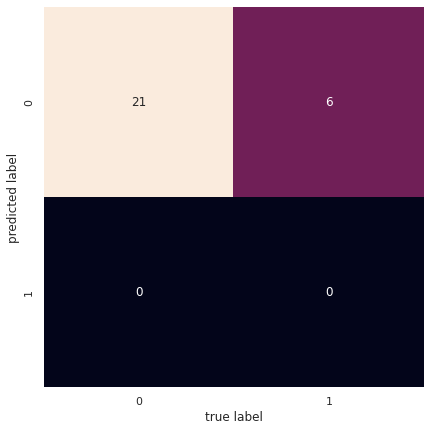

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test[:174], predicted_y_[:174])
plt.figure(figsize = [7, 7])
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

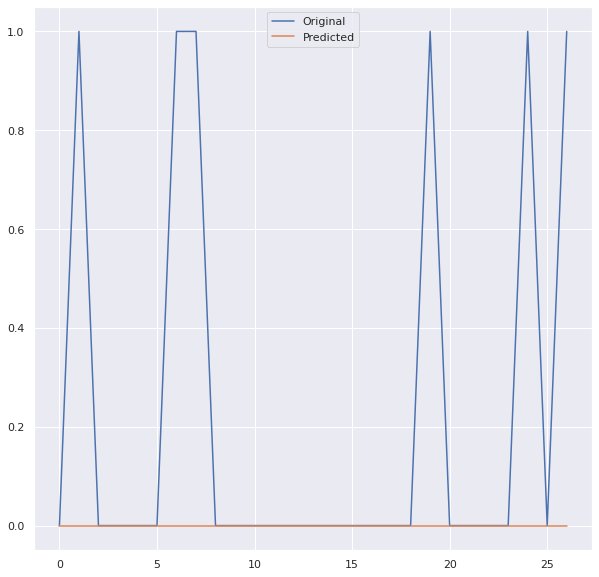

In [ ]:
import matplotlib.pyplot as pp
pp.figure(figsize=[10,10])
pp.plot(range(len(y_test[:50])), y_test[:50])
pp.plot(range(len(predicted_y_[:50])), predicted_y_[:50])
pp.legend(['Original', 'Predicted'])
pp.show()
